<a href="https://colab.research.google.com/github/ssyifab/main/blob/main/Decision_Tree_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
#Import Library yan dibutuhkan
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
from sklearn import tree
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [72]:
#Import Data
data=pd.read_csv('/bin/Data-Sucofindo.csv')

In [73]:
data

,Kode_dagri,Nama_Dagri,Jumlah_APBD,Pencapaian_Vaksin,Risiko
0,1101,KAB ACEH SELATAN,94434140160,0.673552,1
1,1102,KAB ACEH TENGGARA,78283563008,0.677981,1
2,1103,KAB ACEH TIMUR,97793613824,0.642095,1
3,1104,KAB ACEH TENGAH,70192316416,0.707878,0
4,1105,KAB ACEH BARAT,74354622464,0.755835,1
...,...,...,...,...,...
420,9206,KAB TELUK BINTUNI,102854000000,0.377155,1
421,9207,KAB TELUK WONDAMA,59236724736,0.393940,1
422,9208,KAB KAIMANA,54255947776,0.296039,1
423,9209,KAB TAMBRAUW,280842000000,0.106461,1


**Membagi Data kedalam Variabel Dependen dan Variabel Independen**

In [74]:
X=data[['Pencapaian_Vaksin','Jumlah_APBD']].values

In [75]:
Y=data['Risiko']

**Data dipisahkan menjadi data training dan data testing**

In [89]:
X_trainset, X_testset, Y_trainset, Y_testset =train_test_split(X, Y, test_size=0.3, random_state=20)

In [90]:
#untuk mengetahui bentuk dari data training
X_trainset.shape

(297, 2)

In [91]:
Y_trainset.shape

(297,)

**Membangun Model Decision Tree**

In [99]:
dectree=DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [100]:
#Mentraining data training
dectree.fit(X_trainset,Y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [101]:
PredictTree = dectree.predict(X_testset)

In [102]:
print(X_testset[0:5])

[[5.89237455e-01 5.23879014e+10]
 [7.14126037e-01 4.90239590e+10]
 [6.85143946e-01 1.43800177e+10]
 [2.29773692e-01 7.78132357e+10]
 [7.87765785e-01 8.64210022e+09]]


In [103]:
print(PredictTree[0:424])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


**Mengevaluasi suatu model dengan melihat nilai akurasi model**

In [104]:
metrics.accuracy_score(Y_testset,PredictTree)

0.8359375

**Memvisualisasikan hasil analisis menggunakan Decision Tree**

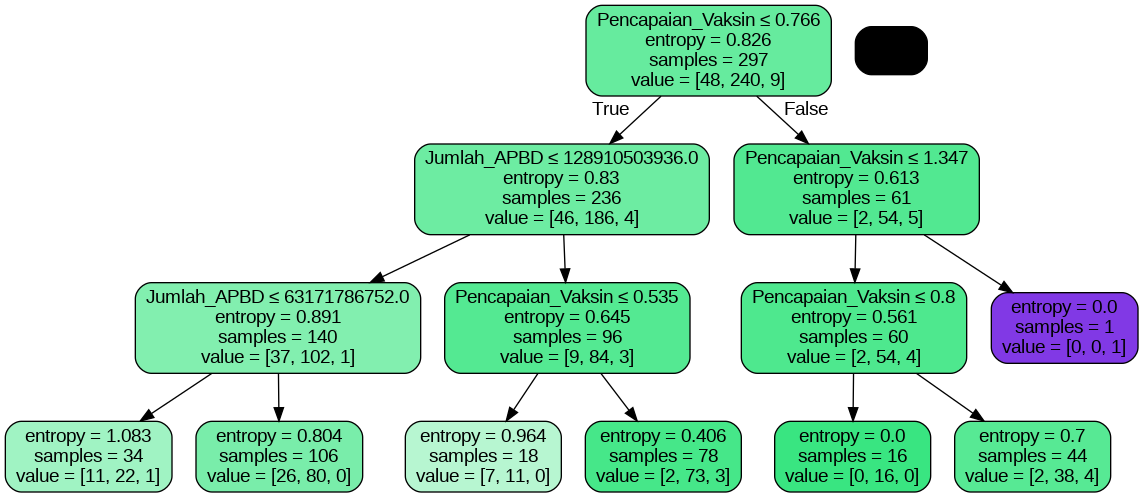

In [105]:
dot_data = StringIO()
feature_cols=['Pencapaian_Vaksin','Jumlah_APBD']
export_graphviz(dectree, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Risiko.png')
Image(graph.create_png())
